In [1]:
import librosa
import librosa.display

import IPython.display as ipd

import numpy as np
import matplotlib.pyplot as plt

In [2]:
!gdown https://drive.google.com/uc?id=1mS4RKwiqSgcjxIR7Vs5qzFlVS7F_f65b
!gdown https://drive.google.com/uc?id=1M9Tlwboqc3UoEBlMDqhKwv0BDN4JSjMO

Downloading...
From: https://drive.google.com/uc?id=1mS4RKwiqSgcjxIR7Vs5qzFlVS7F_f65b
To: /content/베토벤_월광소나타_3악장_아우스피아_320kbps.mp3
100% 17.4M/17.4M [00:00<00:00, 129MB/s] 
Downloading...
From: https://drive.google.com/uc?id=1M9Tlwboqc3UoEBlMDqhKwv0BDN4JSjMO
To: /content/베토벤_월광_소나타_320kbps.mp3
100% 18.5M/18.5M [00:00<00:00, 167MB/s]


In [3]:
audio_path = "/content/베토벤_월광_소나타_320kbps.mp3"

In [ ]:
ipd.Audio(audio_path)

Output hidden; open in https://colab.research.google.com to view.

In [7]:
# sr = 16000이 의미하는 것은 1초당 16000개의 데이터를 샘플링 한다는 것입니다. sampling rate=16000
y, sr = librosa.load(audio_path, sr=None)#16000)

print('sr:', sr, ', audio shape:', y.shape)
print('length:', y.shape[0]/float(sr), 'secs')

sr: 44100 , audio shape: (20340736,)
length: 461.24117913832197 secs


In [ ]:
!pip install --upgrade librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
plt.figure(figsize = (10,5))
librosa.display.waveplot(y, sr=sr)
plt.ylabel("Amplitude")
plt.show()

AttributeError: ignored

<Figure size 1000x500 with 0 Axes>

Waveform - Time-Domain Representation
시간에 따른 파동의 형태

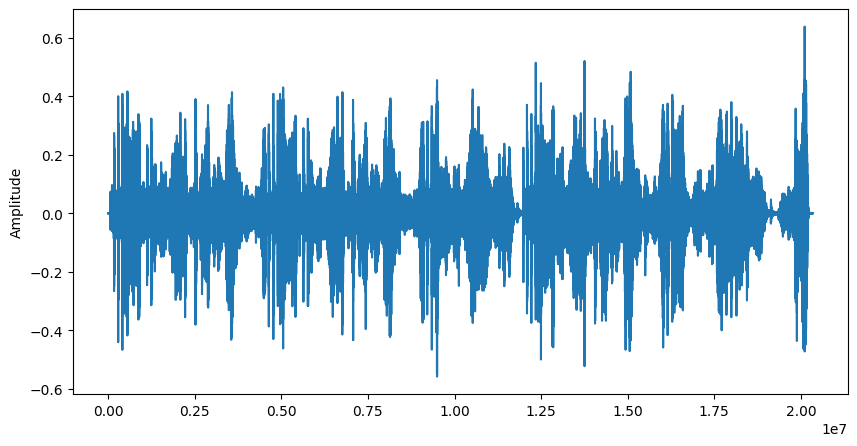

In [8]:
import librosa
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y)
plt.ylabel('Amplitude')
plt.show()


정현파(Sinusoid) - Time-Frequency Representation
푸리에 변환으로 진폭, 주파수로 표현한 것

Text(0.5, 1.0, 'Power spectrum')

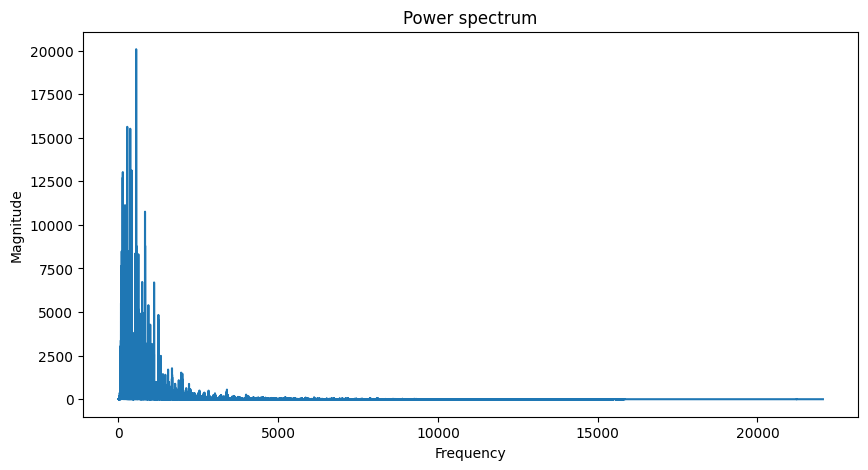

In [9]:
# Fourier -> Spectrum

fft = np.fft.fft(y)

magnitude = np.abs(fft) 
frequency = np.linspace(0,sr,len(magnitude))

left_spectrum = magnitude[:int(len(magnitude) / 2)]
left_frequency = frequency[:int(len(frequency) / 2)]

plt.figure(figsize = (10,5))
plt.plot(left_frequency, left_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

In [10]:
n_fft = 2048 
hop_length = 512 

stft = librosa.stft(y, n_fft = n_fft, hop_length = hop_length)
spectrogram = np.abs(stft)
print("Spectogram :\n", spectrogram)

Spectogram :
 [[6.5620613e-11 4.2510059e-08 4.1369816e-08 ... 1.7508973e-03
  6.3176076e-03 4.6062390e-03]
 [2.3928121e-10 4.1737120e-08 6.2625908e-08 ... 2.1413250e-03
  9.2082741e-03 4.6689650e-03]
 [3.8498663e-10 3.8778076e-08 1.8032672e-07 ... 1.8293193e-02
  1.6270127e-02 4.6847854e-03]
 ...
 [1.2342904e-13 3.0145901e-12 1.1317942e-11 ... 7.0588548e-08
  1.9179950e-07 3.6692279e-07]
 [1.2794533e-13 2.7565183e-12 4.9688491e-12 ... 1.3378489e-08
  1.5677679e-07 3.4430747e-07]
 [1.3262983e-13 2.3558772e-12 3.5573171e-14 ... 5.0695057e-09
  1.7579183e-07 3.4432662e-07]]


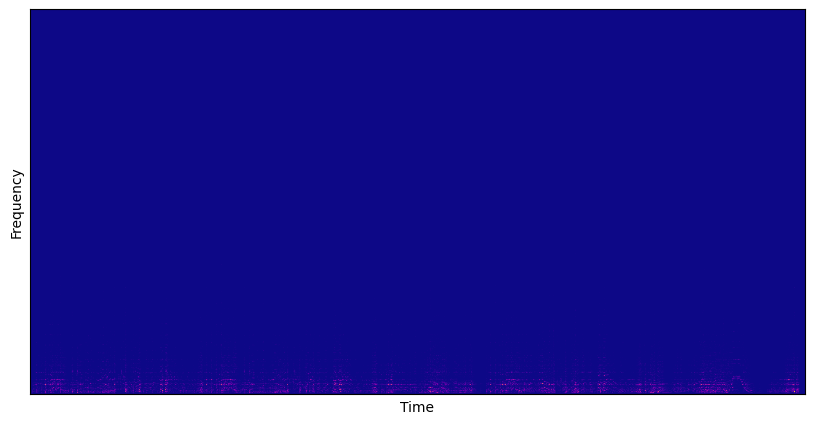

In [11]:
plt.figure(figsize = (10,5))
librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.plasma()
plt.show()

Text(0.5, 1.0, 'Spectrogram (dB)')

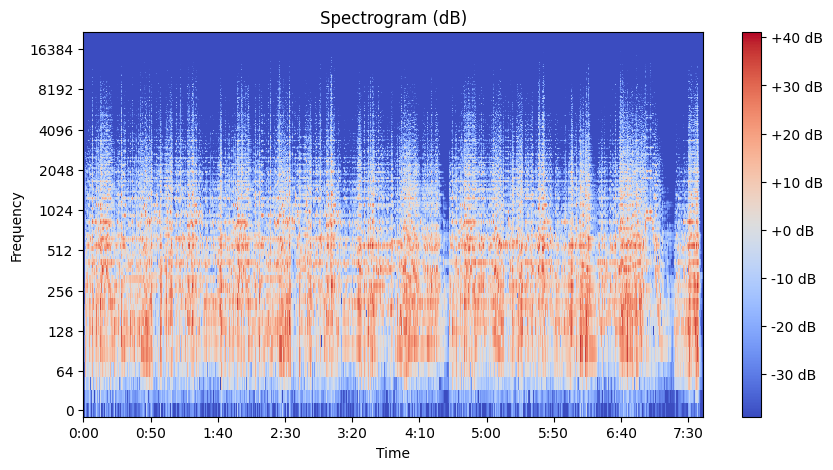

In [12]:
log_spectrogram = librosa.amplitude_to_db(spectrogram)

plt.figure(figsize = (10,5))
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

In [13]:
y, sr = librosa.load(audio_path, sr=None)
n_fft = 2048 
hop_length = 512 


mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20, n_fft=n_fft, hop_length=hop_length)

print("MFCC Shape: ", mfcc.shape)
print("MFCC: \n", mfcc)

MFCC Shape:  (20, 39729)
MFCC: 
 [[-601.85156    -601.85156    -601.85156    ... -600.52673
  -601.1278     -601.85156   ]
 [   0.            0.            0.         ...    1.8619926
     1.0227978     0.        ]
 [   0.            0.            0.         ...    1.8278079
     1.0204899     0.        ]
 ...
 [   0.            0.            0.         ...    1.0603116
     0.81310034    0.        ]
 [   0.            0.            0.         ...    1.0940089
     0.78921294    0.        ]
 [   0.            0.            0.         ...    1.1281545
     0.76432216    0.        ]]


In [14]:
print(sr)

44100


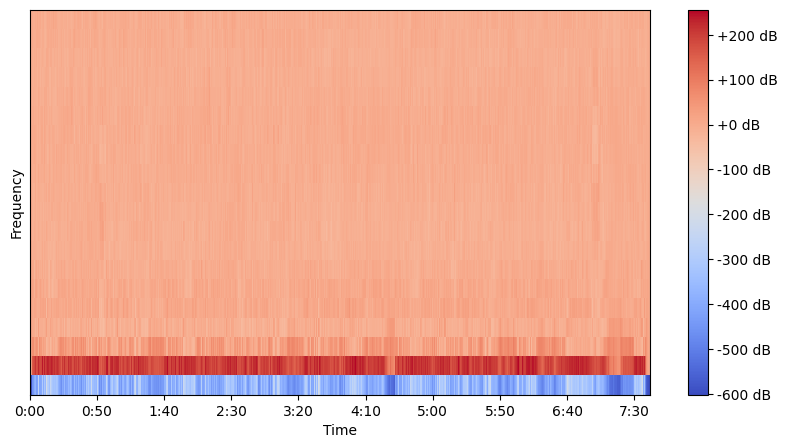

In [15]:
plt.figure(figsize = (10,5))
librosa.display.specshow(mfcc, sr=sr, hop_length=hop_length, x_axis='time')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.show()

https://panggu15.github.io/basic/sound_anal/

In [ ]:
audio_path = "/content/베토벤_월광소나타_3악장_아우스피아_320kbps.mp3"

In [ ]:
ipd.Audio(audio_path)

Output hidden; open in https://colab.research.google.com to view.

In [16]:
# sr = 16000이 의미하는 것은 1초당 16000개의 데이터를 샘플링 한다는 것입니다. sampling rate=16000
y, sr = librosa.load(audio_path, sr=None)

print('sr:', sr, ', audio shape:', y.shape)
print('length:', y.shape[0]/float(sr), 'secs')

sr: 44100 , audio shape: (20340736,)
length: 461.24117913832197 secs


In [ ]:
# !pip install --upgrade librosa

In [ ]:
# plt.figure(figsize = (10,5))
# librosa.display.waveplot(y, sr=sr)
# plt.ylabel("Amplitude")
# plt.show()

Waveform - Time-Domain Representation
시간에 따른 파동의 형태

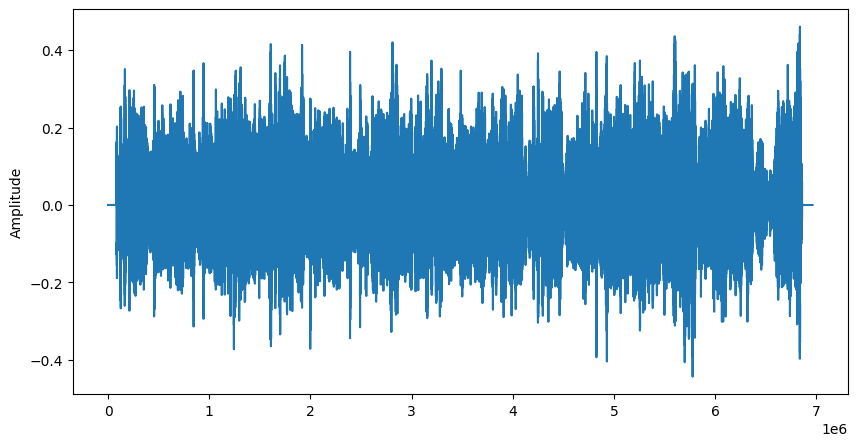

In [ ]:
import librosa
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y)
plt.ylabel('Amplitude')
plt.show()


정현파(Sinusoid) - Time-Frequency Representation
푸리에 변환으로 진폭, 주파수로 표현한 것

Text(0.5, 1.0, 'Power spectrum')

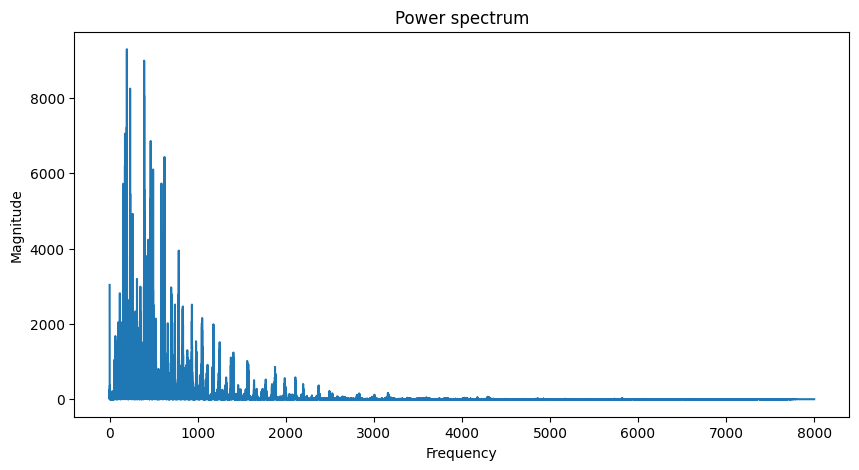

In [ ]:
# Fourier -> Spectrum

fft = np.fft.fft(y)

magnitude = np.abs(fft) 
frequency = np.linspace(0,sr,len(magnitude))

left_spectrum = magnitude[:int(len(magnitude) / 2)]
left_frequency = frequency[:int(len(frequency) / 2)]

plt.figure(figsize = (10,5))
plt.plot(left_frequency, left_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

In [ ]:
n_fft = 2048 
hop_length = 512 

stft = librosa.stft(y, n_fft = n_fft, hop_length = hop_length)
spectrogram = np.abs(stft)
print("Spectogram :\n", spectrogram)

Spectogram :
 [[1.3871690e+00 1.6642948e+00 1.4075227e+00 ... 1.5431422e-02
  1.5406034e-02 1.3585434e-02]
 [1.2361953e+00 7.6047671e-01 8.9395702e-01 ... 7.7184732e-03
  7.8013353e-03 8.2348827e-03]
 [1.0824275e+00 6.2116158e-01 1.3389638e-01 ... 3.1375961e-04
  3.4417291e-04 9.3859847e-04]
 ...
 [3.9839786e-05 1.9591089e-05 1.3384711e-07 ... 1.2980143e-09
  3.0596869e-08 5.6200461e-06]
 [4.0177449e-05 2.0936281e-05 1.8758138e-06 ... 5.3091120e-10
  2.9969268e-08 5.6182143e-06]
 [4.0011579e-05 1.8614730e-05 2.7515127e-06 ... 6.8368033e-10
  3.0036102e-08 5.6172357e-06]]


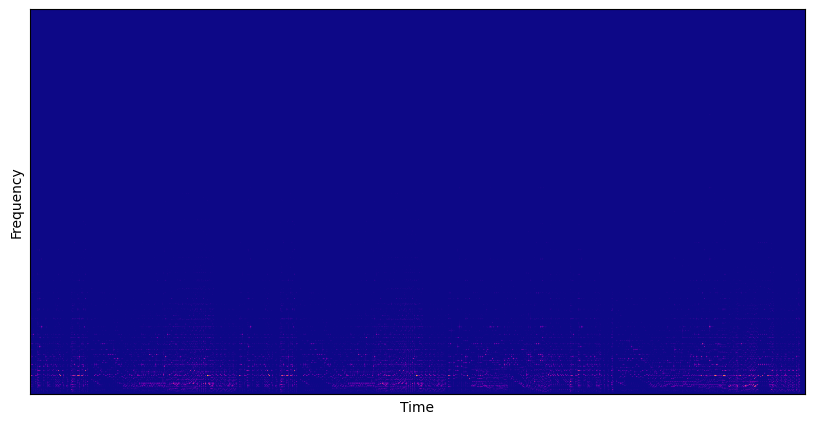

In [ ]:
plt.figure(figsize = (10,5))
librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.plasma()
plt.show()

Text(0.5, 1.0, 'Spectrogram (dB)')

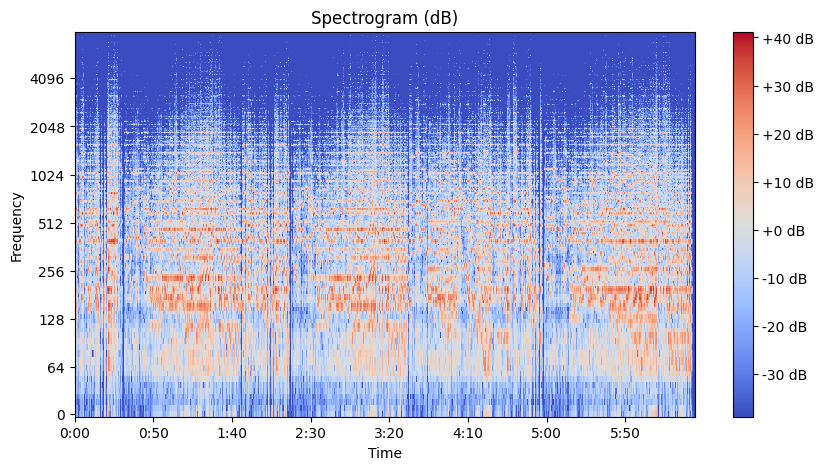

In [ ]:
log_spectrogram = librosa.amplitude_to_db(spectrogram)

plt.figure(figsize = (10,5))
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

In [ ]:
y, sr = librosa.load(audio_path, sr=16000)

mfcc = librosa.feature.mfcc(y=y, sr=16000, n_mfcc=20, n_fft=n_fft, hop_length=hop_length)

print("MFCC Shape: ", mfcc.shape)
print("MFCC: \n", mfcc)

MFCC Shape:  (20, 13601)
MFCC: 
 [[-620.929 -620.929 -620.929 ... -620.929 -620.929 -620.929]
 [   0.       0.       0.    ...    0.       0.       0.   ]
 [   0.       0.       0.    ...    0.       0.       0.   ]
 ...
 [   0.       0.       0.    ...    0.       0.       0.   ]
 [   0.       0.       0.    ...    0.       0.       0.   ]
 [   0.       0.       0.    ...    0.       0.       0.   ]]


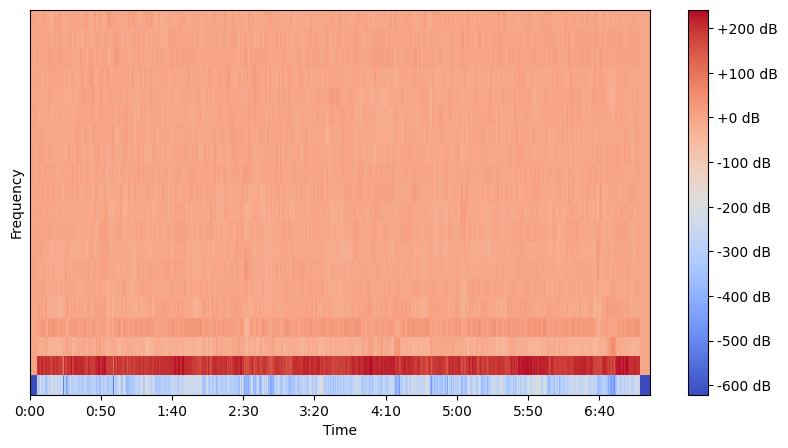

In [ ]:
plt.figure(figsize = (10,5))
librosa.display.specshow(mfcc, sr=16000, hop_length=hop_length, x_axis='time')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.show()

In [17]:
audio_path = "/content/beethoven_opus10_1.mp3"

In [ ]:
ipd.Audio(audio_path)

Output hidden; open in https://colab.research.google.com to view.

In [18]:
# sr = 16000이 의미하는 것은 1초당 16000개의 데이터를 샘플링 한다는 것입니다. sampling rate=16000
y, sr = librosa.load(audio_path, sr=None)

print('sr:', sr, ', audio shape:', y.shape)
print('length:', y.shape[0]/float(sr), 'secs')

sr: 44100 , audio shape: (17377920,)
length: 394.0571428571429 secs


In [ ]:
# !pip install --upgrade librosa

In [ ]:
# plt.figure(figsize = (10,5))
# librosa.display.waveplot(y, sr=sr)
# plt.ylabel("Amplitude")
# plt.show()

Waveform - Time-Domain Representation
시간에 따른 파동의 형태

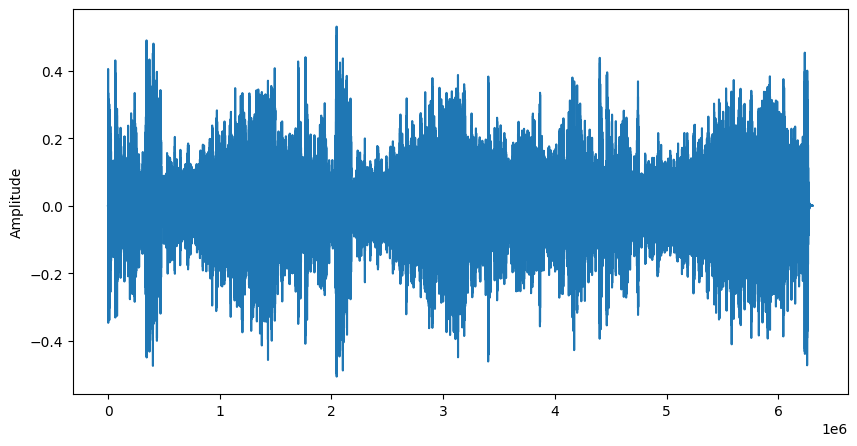

In [ ]:
import librosa
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y)
plt.ylabel('Amplitude')
plt.show()


정현파(Sinusoid) - Time-Frequency Representation
푸리에 변환으로 진폭, 주파수로 표현한 것

Text(0.5, 1.0, 'Power spectrum')

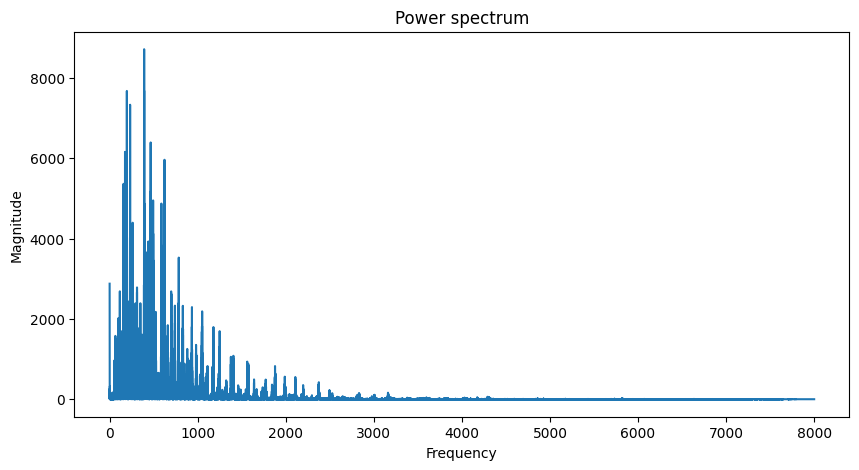

In [ ]:
# Fourier -> Spectrum

fft = np.fft.fft(y)

magnitude = np.abs(fft) 
frequency = np.linspace(0,sr,len(magnitude))

left_spectrum = magnitude[:int(len(magnitude) / 2)]
left_frequency = frequency[:int(len(frequency) / 2)]

plt.figure(figsize = (10,5))
plt.plot(left_frequency, left_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

In [ ]:
n_fft = 2048 
hop_length = 512 

stft = librosa.stft(y, n_fft = n_fft, hop_length = hop_length)
spectrogram = np.abs(stft)
print("Spectogram :\n", spectrogram)

Spectogram :
 [[4.2140397e-01 1.0289891e+00 1.3571596e+00 ... 1.5094445e-02
  1.1504023e-02 4.2749555e-03]
 [4.3382210e-01 7.1655768e-01 6.7215037e-01 ... 7.7088252e-03
  8.0107050e-03 3.8038036e-03]
 [4.8688555e-01 6.0145593e-01 4.5405483e-01 ... 2.2629148e-04
  2.4630961e-03 2.6621707e-03]
 ...
 [1.5258797e-07 7.9844756e-07 1.2961245e-06 ... 1.2199963e-09
  2.8369305e-09 3.7917793e-09]
 [1.7244864e-07 7.1495316e-07 2.1462517e-06 ... 4.0889175e-10
  1.6623016e-09 2.6756193e-09]
 [1.7261196e-07 1.3232020e-07 2.2536783e-06 ... 3.3640039e-11
  1.8187915e-09 2.7566365e-09]]


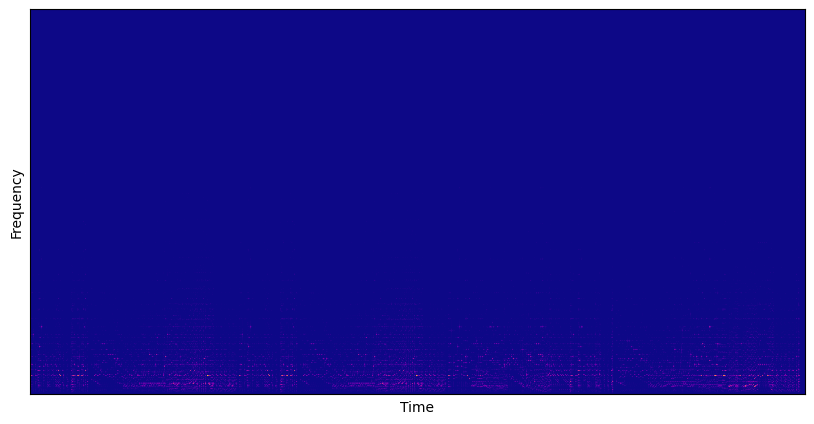

In [ ]:
plt.figure(figsize = (10,5))
librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.plasma()
plt.show()

Text(0.5, 1.0, 'Spectrogram (dB)')

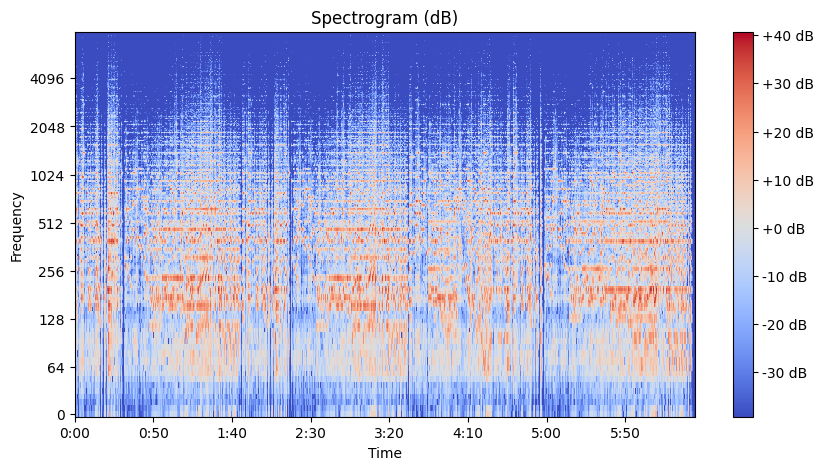

In [ ]:
log_spectrogram = librosa.amplitude_to_db(spectrogram)

plt.figure(figsize = (10,5))
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

In [ ]:
y, sr = librosa.load(audio_path, sr=16000)

mfcc = librosa.feature.mfcc(y=y, sr=16000, n_mfcc=20, n_fft=n_fft, hop_length=hop_length)

print("MFCC Shape: ", mfcc.shape)
print("MFCC: \n", mfcc)

MFCC Shape:  (20, 12315)
MFCC: 
 [[-3.0404224e+02 -1.9115952e+02 -1.6683243e+02 ... -5.8914655e+02
  -5.8914655e+02 -5.8914655e+02]
 [ 1.8273074e+02  2.0391650e+02  2.0438133e+02 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [-2.7728287e+01 -3.8431999e+01 -3.4697536e+01 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 ...
 [ 6.0777636e+00  3.8142085e-01 -8.1051636e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [ 6.1008492e+00  4.9776773e+00  6.0796456e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]
 [-2.4236248e+00 -4.8637810e+00 -5.0566139e+00 ...  0.0000000e+00
   0.0000000e+00  0.0000000e+00]]


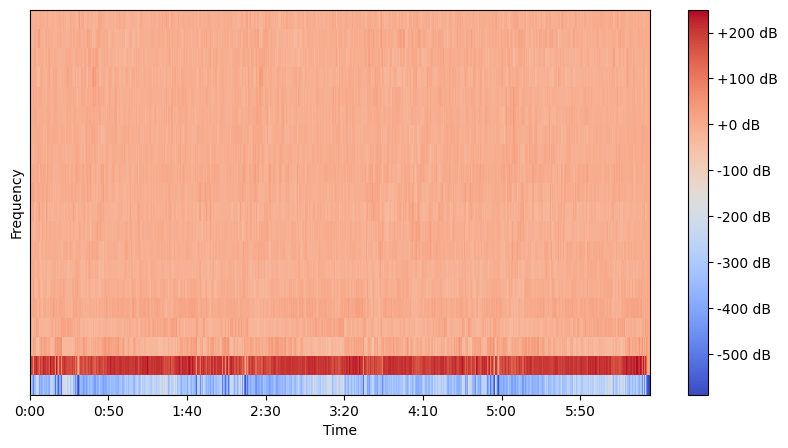

In [ ]:
plt.figure(figsize = (10,5))
librosa.display.specshow(mfcc, sr=16000, hop_length=hop_length, x_axis='time')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.show()

In [23]:
audio_path = "/content/beethoven_opus10_1.ogg"

In [ ]:
ipd.Audio(audio_path)

Output hidden; open in https://colab.research.google.com to view.

In [24]:
# sr = 16000이 의미하는 것은 1초당 16000개의 데이터를 샘플링 한다는 것입니다. sampling rate=16000
y, sr = librosa.load(audio_path, sr=None)

print('sr:', sr, ', audio shape:', y.shape)
print('length:', y.shape[0]/float(sr), 'secs')

sr: 44100 , audio shape: (17376000,)
length: 394.01360544217687 secs


In [ ]:
!pip install --upgrade librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# plt.figure(figsize = (10,5))
# librosa.display.waveplot(y, sr=sr)
# plt.ylabel("Amplitude")
# plt.show()

Waveform - Time-Domain Representation
시간에 따른 파동의 형태

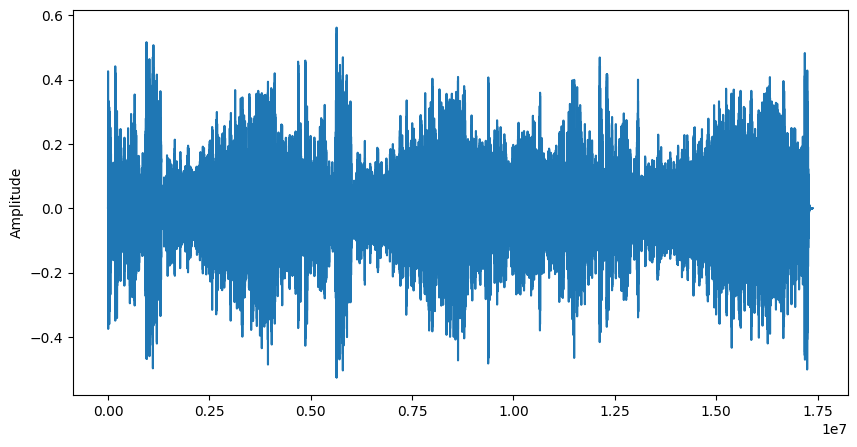

In [25]:
import librosa
import matplotlib.pyplot as plt

plt.figure(figsize=(10,5))
plt.plot(y)
plt.ylabel('Amplitude')
plt.show()


정현파(Sinusoid) - Time-Frequency Representation
푸리에 변환으로 진폭, 주파수로 표현한 것

Text(0.5, 1.0, 'Power spectrum')

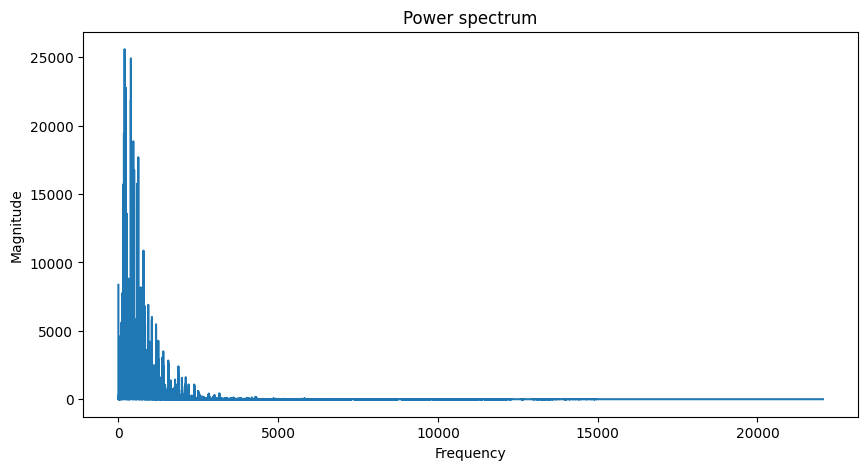

In [26]:
# Fourier -> Spectrum

fft = np.fft.fft(y)

magnitude = np.abs(fft) 
frequency = np.linspace(0,sr,len(magnitude))

left_spectrum = magnitude[:int(len(magnitude) / 2)]
left_frequency = frequency[:int(len(frequency) / 2)]

plt.figure(figsize = (10,5))
plt.plot(left_frequency, left_spectrum)
plt.xlabel("Frequency")
plt.ylabel("Magnitude")
plt.title("Power spectrum")

In [ ]:
n_fft = 2048 
hop_length = 512 

stft = librosa.stft(y, n_fft = n_fft, hop_length = hop_length)
spectrogram = np.abs(stft)
print("Spectogram :\n", spectrogram)

Spectogram :
 [[1.3871690e+00 1.6642948e+00 1.4075227e+00 ... 1.5431422e-02
  1.5406034e-02 1.3585434e-02]
 [1.2361953e+00 7.6047671e-01 8.9395702e-01 ... 7.7184732e-03
  7.8013353e-03 8.2348827e-03]
 [1.0824275e+00 6.2116158e-01 1.3389638e-01 ... 3.1375961e-04
  3.4417291e-04 9.3859847e-04]
 ...
 [3.9839786e-05 1.9591089e-05 1.3384711e-07 ... 1.2980143e-09
  3.0596869e-08 5.6200461e-06]
 [4.0177449e-05 2.0936281e-05 1.8758138e-06 ... 5.3091120e-10
  2.9969268e-08 5.6182143e-06]
 [4.0011579e-05 1.8614730e-05 2.7515127e-06 ... 6.8368033e-10
  3.0036102e-08 5.6172357e-06]]


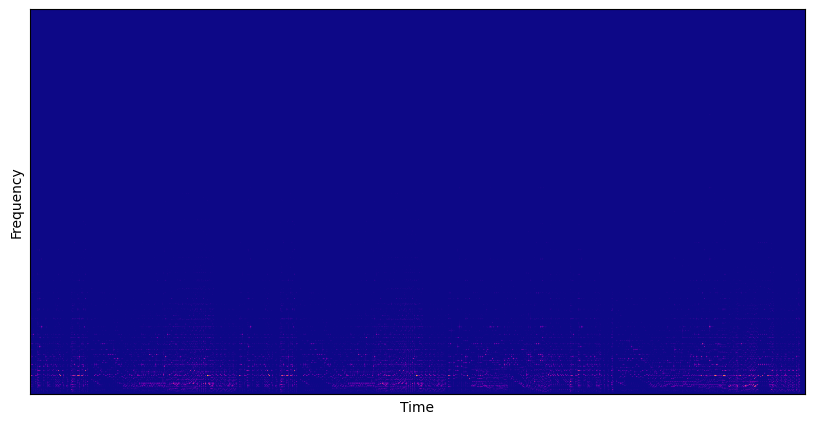

In [ ]:
plt.figure(figsize = (10,5))
librosa.display.specshow(spectrogram, sr=sr, hop_length=hop_length)
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.plasma()
plt.show()

Text(0.5, 1.0, 'Spectrogram (dB)')

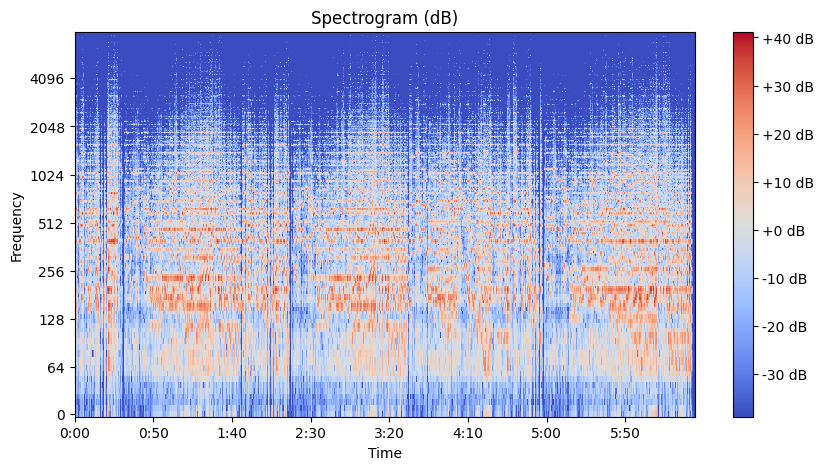

In [ ]:
log_spectrogram = librosa.amplitude_to_db(spectrogram)

plt.figure(figsize = (10,5))
librosa.display.specshow(log_spectrogram, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format="%+2.0f dB")
plt.title("Spectrogram (dB)")

In [ ]:
y, sr = librosa.load(audio_path, sr=16000)

mfcc = librosa.feature.mfcc(y=y, sr=16000, n_mfcc=20, n_fft=n_fft, hop_length=hop_length)

print("MFCC Shape: ", mfcc.shape)
print("MFCC: \n", mfcc)

MFCC Shape:  (20, 12313)
MFCC: 
 [[-201.0661    -161.2444    -171.03578   ... -583.4769    -583.4769
  -583.4769   ]
 [ 200.84702    203.81113    201.50801   ...    0.           0.
     0.       ]
 [ -34.650776   -34.26539    -34.600414  ...    0.           0.
     0.       ]
 ...
 [   1.5001624   -6.497465   -10.727014  ...    0.           0.
     0.       ]
 [   6.5570135    6.484451    10.207267  ...    0.           0.
     0.       ]
 [  -2.1329105   -4.889575    -7.149457  ...    0.           0.
     0.       ]]


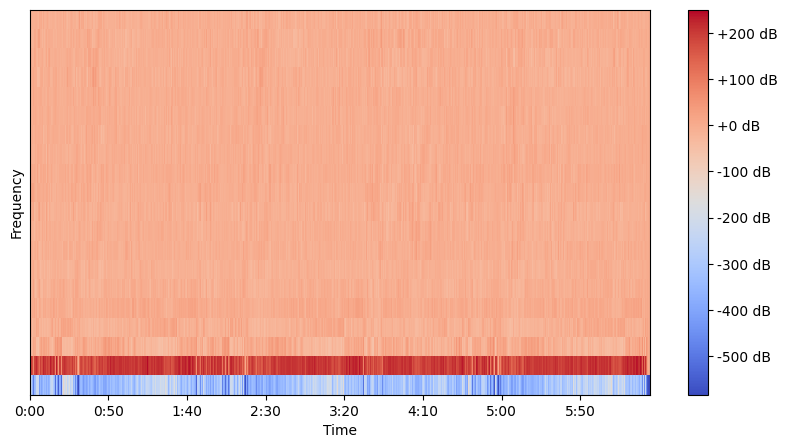

In [ ]:
plt.figure(figsize = (10,5))
librosa.display.specshow(mfcc, sr=16000, hop_length=hop_length, x_axis='time')
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.colorbar(format='%+2.0f dB')
plt.show()

# 오디오 처리(Audio Processing)

* 소리는 진동으로 인한 공기의 압축으로 생성
* 압축이 얼마나 됬느냐에 따라 진동하며, 공간이나 매질을 전파해 나가는 현상인 Wave(파동)으로 표현
* 파동에서 얻을 수 있는 정보
  + 위상(Phase; Degress of displacement)
  + 진폭(Amplitude; Intensity)
  + 주파수(Frequency)

![](https://miro.medium.com/max/700/0*QFVha2lCgyhKjhuO.gif)





## 오디오 라이브러리

* librosa는 각종 음성 처리에 유용한 라이브러리
* colab 환경에서 torchaudio는 별도 설치가 필요
* 해당 예제에서는 torchaudio를 이용해 음성 데이터를 가져옴

In [ ]:
!pip install torchaudio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

import librosa
import librosa.display
import torch
import torchaudio
import IPython.display as ipd

<ipython-input-2-2b8ad6e4d21f>:4: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-white')


## 오디오 데이터 

*   pytorch의 torchaudio를 사용해 내장 데이터셋을 가져옴
*   데이터가 크기 때문에 시간이 많이 소요



*   불러온 데이터 확인
  *   첫번째 줄에서는 소리 데이터 확인 가능
  *   두번째 줄에선 해당 데이터의 sampling rate 확인 가능







*   불러온 데이터의 형상을 확인
*   데이터 길이만으로는 음성이 몇초에 해당하는지(duration)를 알 수 없음



## 샘플링(Sampling)

### Sampling

* 음성을 처리하기 위해 아날로그 정보를 잘게 쪼개 이산적인 디지털 정보로 표현해야 함
* 이때 무한히 쪼개서 저장할 수는 없으므로, 기준을 세워 아날로그 정보를 쪼개 대표값을 사용, 이를 샘플링이라 함
* 주로 사용할 때 시간을 기준으로 아날로그 정보를 쪼개는 Time Domain 방식을 사용

* Sampling rate
  * sampling rate는 아날로그 정보를 얼마나 잘게 쪼갤지를 결정
  * 잘게 쪼갤수록 정보 손실이 줄어들지만, 데이터의 크기가 늘어남
* Sampling theorem
  * sampling rate가 최대 frequency보다 2배 커져야 함을 의미
  * 일반적으로 sampling은 인간의 청각 영역에 맞게 형성
    - Audio CD : 44.1 kHz(44100 sample/second)
    - Speech communication : 8 kHz(8000 sample/second)







*   음성의 duration은 데이터의 길이와 sampling rate를 나누어 확인 가능


8kbps
따라서 샘플 레이트 16000

### Resampling

* Resampling은 sampling data의 sampling rate를 조정해 다시 sampling하는 것
* 이때 일반적으로 보간(interpolation)을 할때는 low-pass filter를 사용
* `librosa.resample`을 사용하면 편리하게 resampling 가능
* 현재 데이터는 `torch tensor`, `librosa`는 `numpy` 배열을 받아들이기 때문에 변환 필요
* sampling rate를 절반으로 줄여, 길이도 절반으로 준 것을 확인할 수 있음


### Normalization & Quantization

*   데이터간 음량이 제각각인 경우 normalization을 하여 amplitude를 [-1, 1] 범위로 조정
*   여기서는 가장 간단한 방법인 데이터의 최대값으로 나눠주는 방법을 사용



quantized시 연속적이지 않으므로 품질 하락

### Mu-Law Encoding

* 사람의 귀는 작은소리의 차이는 잘잡아내는데 반해 소리가 커질수록 그 차이를 잘 느끼지 못함
* 이러한 특성을 wave값을 표현하는데 반영해 작은 값에는 높은 분별력을, 큰 값끼리는 낮은 분별력을 갖도록 함



Mu-Law Encoding시 음량이 커짐

# 오디오 표현(Audio Representation)

* Sampling된 discrete한 데이터를 표현
  + 시간의 흐름에 따라, 공기의 파동의 크기로 보는 Time-Domain Representation 방법
  + 시간에 따라서 frequency의 변화를 보는 Time-Frequency Representation

## Waveform - Time-Domain Representation

* Waveform은 오디오의 자연적인 표현
* 시간이 x축으로 그리고 amplitude가 y축으로 표현

In [ ]:
audio_np = audio_data.numpy()

fig = 

## 정현파(Sinusoid) - Time-Frequency Representation

![](https://upload.wikimedia.org/wikipedia/commons/6/61/FFT-Time-Frequency-View.png)

* 모든 신호는 주파수(frequency)와 크기(magnitude), 위상(phase)이 다른 정현파(sinusolida signal)의 조합으로 나타낼 수 있음
* 퓨리에 변환은 조합된 정현파의 합(하모니) 신호에서 그 신호를 구성하는 정현파들을 각각 분리해내는 방법

In [ ]:
def Sinusoid(A, f, phi, fs, t):
  

In [ ]:
sin = Sinusoid(A, f, phi, fs, t)

In [ ]:
A = 0.9
f = 260
phi = np.pi/2
fs = 22050
t = 1

In [ ]:
sin2 = S

## 푸리에 변환(Fourier Fransform)


* 푸리에 변환은 임의의 입력 신호를 다양한 주파수를 갖는 주기 함수들의 합으로 분해하여 표현하는 것을 의미
* 푸리에 변환 식
$$
A_k = \frac{1}{T} \int_{-\frac{T}{2}}^\frac{T}{2} f(t) \, \exp \left( -i\cdot 2\pi \frac{k}{T} t \right) \, dt
$$
$$
y(t)=\sum_{k=-\infty}^\infty A_k \, \exp \left( i\cdot 2\pi\frac{k}{T} t \right)
$$



* 위 식에는 주기 함수들은 포함되어 있지 않음
* 오일러 공식에 따라 다음과 같이 지수 함수와 주기 함수간 관계를 나타낼 수 있음
$$
e^{i\theta} = \cos{\theta} + i\sin{\theta}
$$

* 해당 식을 오일러 공식에 따라 다음과 같이 표현 가능

$$
\exp \left( i\cdot 2\pi\frac{k}{T} t \right) = \cos\left({2\pi\frac{k}{T}}\right) + i\sin\left({2\pi\frac{k}{T}}\right)
$$

*   결국 푸리에 변환은 입력 신호에 상관없이 sin, cos 같은 주기 함수들의 합으로 분해 가능함을 나타냄

### 이산 푸리에 변환(Discrete Fourier Transform, DFT)



*   우리가 샘플링한 데이터는 discrete data라고 할 수 있음
*   위의 푸리에 변환을 이산 영역으로 생각해볼 수 있음
*   우리가 수집한 데이터 $y_n$에서 이산 시계열 데이터가 주기 N으로 반복한다고 할때, DFT는 주파수와 진폭이 다른 N개의 사인 함수 합으로 표현 가능
$$
y_n = \frac{1}{N} \sum_{k=0}^{N-1} Y_k \cdot \exp \left( i\cdot 2\pi\frac{k}{N} n \right)
$$

*   위 식을 보면 k의 range가 0부터 $N-1$로 변화했음을 알 수 있음 
*   이때 Spectrum $Y_{k}$는 원래의 시계열 데이터에 대한 퓨리에 변환값

$$
Y_k = \sum_{n=0}^{N-1} y_n\cdot \exp \left( -i\cdot 2\pi\frac{k}{N} n \right)
$$

  * $y_{n}$ : input signal
  * $n$ : Discrete time index
  * $k$ : discrete frequency index
  * $Y_{k}$ : k번째 frequeny에 대한 Spectrum의 값



* DFT 수식을 코드로 나타내면 다음과 같음

### Short-Time Fourier Transform(STFT)



*   DFT는 시간에 흐름에 따라 신호의 수파수가 변했을때, 어느 시간대에 주파수가 변하는지 모름
*   STFT는 시간의 길이를 나눠서 이제 퓨리에 변환
*   주파수의 특성이 시간에 따라 달라지는 사운드를 분석하는 방법이며 우리가 사용하는 signal 데이터에 적합
*   시계열 데이터를 일정한 시간 구간 (window size)로 나누고, 각 구간에 대해서 스펙트럼을 구함

*   STFT에 대한 식과 설명은 다음과 같음

$$
X(l,k) = \sum_{n=0}^{N-1} w(n) x(n+lH)\exp^{\frac{-2\pi k n}{N}}
$$

- $N$ : FFT size
    - Window를 얼마나 많은 주파수 밴드로 나누는가

- Duration
    - 샘플링 레이트를 window로 나눈 값
    - $T= window/SR$
    - T(Window) = 5T(Signal), duration은 신호주기보다 5배 이상 길게 잡아야함
    - 440Hz 신호의 window size는 5*(1/440)

- $w(n)$ : Window function
    - 일반적으로 Hann window 사용

- $n$ : Window size
    - Window 함수에 들어가는 Sample의 양
    - 작을수록 Low-frequency resolution을 가지게 되고, high-time resolution을 가짐
    - 길수록 High-frequency, low time resolution을 가짐
    
- $H$ : Hop size
    - 윈도우가 겹치는 사이즈, 일반적으로는 1/4정도를 겹치게 함

* STFT의 결과는 즉 시간의 흐름(Window)에 따른 Frequency영역별 Amplitude를 반환



#### 윈도우 함수(Window Function)

* Window function 기능
  1. main-lobe를 제어
  2. side-lobe의 레벨 trade-off를 제어
  3. 깁스 현상(불연속을 포함하는 파형이 푸리에 합성되었을 때 불연속 값에서 나타나는 불일치 현상) 방지



#### 윈도우 크기(Window Size)




*   window size는 time과 frequency의 resolutions를 제어
  * short-window - 낮은 frequency resolutuon, 높은 time resolution
  * long-window - 높은 frequency resolution, 낮은 time resolution



## 스펙트로그램(Spectrogram)

* 스펙트로그램은 소리나 파동을 시각화하여 파악하기 위한 도구
* 파형과 스펙트럼의 특징이 조합되어 있음
* 시간 축과 주파수 축의 변화에 따라 진폭의 차이를 인쇄 농도나 표시 색상 차이로 표현



### Linear Frequency Scale



*   순음(single tone)들의 배음 구조를 파악하는데 적절
*   분포가 저주파수 영역에 치우쳐져 있음



### 멜 스케일(Mel Scale)



*   주파수 단위를 다음 공식에 따라 멜 스케일로 변환
$$
m = 2595 \log_{10}\left(1 + \frac{f}{700}\right)
$$
*   일반적으로 mel-scaled bin을 FFT size보다 조금 더 작게 만듬
*   해당 scale을 적용해 spectogram을 만든 것이 melspectogram


### 바크 스케일(Bark Scale)

* 귀가 인식하는 주파수의 영역은 대략 $20Hz~2000Hz$로 가정, 하지만 주파수에 대한 사람의 인식은 비선형적
* 귀와 뇌의 가청대역을 24개의 대역으로 나눈것을 Bark라고 함
* Bark scale은 $500Hz$ 이하에서는 $100Hz$의 대역폭을, $500Hz$ 이상에서는 각 대역의 중심수파수의 대략 20%에 해당하는 대역폭을 가짐
  
  `20, 100, 200, 300, 400, 510, 630, 770, 920, 1080, 1270, 1480, 1720, 2000, 2320, 2700, 3150, 3700, 4400, 5300, 6400, 7700, 9500, 12000, 15500 ( Hz )`

### Log Compression



*   신호를 $ 10 * log10(\frac{S}{ref})$의 단위로 신호를 스케일링
*   spectrogram을 데시벨 유닛으로 전환


## 이산 코사인 변환(Discrete Cosine Transform, DCT)



*   DCT는 n개의 데이터를 n개의 코사인 함수의 합으로 표현하여 데이터의 양을 줄이는 방식
*   저 주파수에 에너지가 집중되고 고 주파수 영역에 에너지가 감소

## 오디오 특징 추출(Audio Feature Extraction)

* 모든 오디오 신호는 많은 기능으로 구성
* 해결하려는 문제와 관련된 특성 추출 필요

### 스펙트럼 센트로이드(Spectral Centroid)

* 주파수의 스펙트럼의 가중 평균과 같음

### 스펙트럼 롤오프(Spectral Rolloff)

* 신호의 모양을 측정
* 고주파수가 0으로 감소하는 주파수를 나타냄

### 스펙트럼 대역폭

* 스펙트럼 대역폭은 최대 피크의 절반 (또는 최대 절반의 전체 너비 [FWHM])에서 빛의 대역 폭으로 정의되며 두 개의 수직 빨간색 선과 파장 축에서 λSB로 표시

### 제로 크로싱 비율(Zero Crossing Rate)

* 신호의 부드러움을 측정하는 매우 간단한 방법은 해당 신호의 세그먼트 내에서 제로 크로싱 수를 계산하는 것
* 음성 신호는 느리게 진동 (예를 들어, 100Hz 신호는 초당 제로 100을 교차하는 반면 무성 마찰음은 초당 3000 개의 제로 교차를 가질 수 있음)

### Mel-Frequency Cepstral Coefficients (MFCC)

* 신호의 MFCC(Mel frequency cepstral coefficients)는 스펙트럼 포락선의 전체 모양을 간결하게 설명하는 작은 기능 집합 (일반적으로 약 10-20)
* 인간 목소리의 특성을 모델링

### 크로마그램(Chromagram)

* 색도 특성 또는 벡터는  일반적으로 각각의 피치 클래스의 많은 에너지가, {C, C #, D, D 번호는, E, ..., B} 신호 내에 존재하는 방법을 나타내는 요소 특징 벡터
* 음악 작품 간의 유사성 측정을 설명하는 강력한 방법 제공

# 오디오 필터(Audio Filter)